In [ ]:
# Mount Google Drive in the Colab.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [ ]:
!ls '/content/drive/MyDrive/Student/Saif/Dataset/hyper-kvasir-labeled-images/lower-gi-tract'

anatomical-landmarks  pathological-findings  quality-of-mucosal-views  therapeutic-interventions


In [ ]:
# os.listdir provides list of all the folders from the Train folder.
# Train folder contains all the necessary darasets folder.
# we save all the folders location in dataPath and lesion_types variable
# dataPath variable shows how many types of lesion are there and lesion_type shows all the dataset folders while printing them.

import os

train_path = "/content/drive/MyDrive/Student/Saif/Dataset/hyper-kvasir-labeled-images/lower-gi-tract"

# Automatically determine the number of main classes
main_classes = len(os.listdir(train_path))

# Determine the number of subclasses per main class
num_sub_classes_per_main = [len(os.listdir(os.path.join(train_path, main_class))) for main_class in os.listdir(train_path)]


dataPath = os.listdir(train_path)

# lesion_types showa how many types of lesion are in the dataset
lesion_types = os.listdir(train_path)

In [ ]:
print(lesion_types)
print("Types of Classes: ", len(dataPath))
print("Total no of Main class: ", main_classes)
print("Total no of Sub class: ", num_sub_classes_per_main)

['therapeutic-interventions', 'anatomical-landmarks', 'quality-of-mucosal-views', 'pathological-findings']
Types of Classes:  4
Total no of Main class:  4
Total no of Sub class:  [2, 2, 3, 4]


In [ ]:
# we collect & store all the images from all the folders in a single (Img[]) array list to work on.

import os
from PIL import Image

dataset_path = "/content/drive/MyDrive/Student/Saif/Dataset/hyper-kvasir-labeled-images/lower-gi-tract"  # Replace with your dataset directory path

Img = [] #storing location of all the images as list

for root, dirs, files in os.walk(dataset_path):
    for file_name in files:

        if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(root, file_name)

            img = Image.open(img_path)

            Img.append(img)

print(f'Total images loaded: {len(Img)}')

Total images loaded: 7131


In [ ]:
print(Img)
print(f"Processed {len(Img)} images.")
print(len(Img))

In [ ]:
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import csv


dataset = "/content/drive/MyDrive/Student/Saif/Dataset/hyper-kvasir-labeled-images/lower-gi-tract"

images = []
labels = []

#  to resize images
def resize_image(image_path, size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(size, Image.Resampling.LANCZOS)
    return img

# for Walk through the dirctory and its subdirectories
for root, dirs, files in os.walk(dataset):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'tiff')):
            image_path = os.path.join(root, file)
            resized_img = resize_image(image_path)
            images.append(resized_img)

            # Extract class label from the directory name
            label = os.path.basename(root)
            labels.append(label)

print(np.shape(images))
print(type(images))
print(labels)



csv_file_path = "/content/drive/MyDrive/Student/Saif/Csv_File/HyperKvasir_VGG19_11_class_labels.csv"

# Ensure the directory exists
os.makedirs(csv_file_path, exist_ok=True)

# Define the full path for the CSV file
csv_file_path = os.path.join(csv_file_path, 'labels.csv')

# Save the labels array to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)

    # Optional: Write a header (if needed)
    writer.writerow(["Label"])

    # Write each label to the CSV file
    for label in labels:
        writer.writerow([label])

print(f"Labels array saved to {csv_file_path}")

In [ ]:
print(labels)

In [ ]:
print(np.shape(images))
print(type(images))
print(labels)


In [ ]:
print(images)

In [ ]:
# convert the images into numpy arrays

import numpy as np

images = np.array(images)

In [ ]:
# normalize images by dividing by 255.0
# we normalize image to decrease the differences of pixel intensity values but the number of pixels remains same
# normalization is importamt for better training
images = images.astype('float32') / 255.0
images.shape

(7131, 224, 224, 3)

In [ ]:
print(images)

In [ ]:
import pandas as pd
from PIL import Image

# Assuming each item in Img needs to be split into 4 components

split_img = []
for item in Img:
    # Convert the image object to its filename (string)
    image_path = item.filename

    # Example splitting logic (modify as needed):
    parts = image_path.split('/')  # Assuming '/' separates the components
    main_class = parts[-3]
    sub_class = parts[-2]
    image_name = parts[-1]
    image_location = image_path
    split_img.append([main_class, sub_class, image_name, image_location])

images_df = pd.DataFrame(data=split_img, columns=['MainClass-name', 'SubClass-name', 'Image-name', 'Image-location'])
print(images_df.head(10000))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels to numerical values
encoded_labels = label_encoder.fit_transform(labels)

# to see the mapping from labels to numbers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Original Labels:", labels)
print("Encoded Labels:", encoded_labels)
print("Label Mapping:", label_mapping)


In [ ]:
# Using encoders to format data appropriately
#'OneHotEncoder' is used for converting categrical variables into a OneHotEncoded as binary vectros
# where only the index corresponding to the category is set to 1, while all other are set to 0.
from sklearn.preprocessing import OneHotEncoder
# to change the shape of the array into 2D array
y=encoded_labels.reshape(-1,1)
onehotencoder = OneHotEncoder(sparse=False)
# fit_transform method is used to transform categorical values in the y array into numerical (unique integer)
Y = onehotencoder.fit_transform(y)
Y.shape

In [ ]:
print(y.shape)
print(Y.shape)
print(Y)


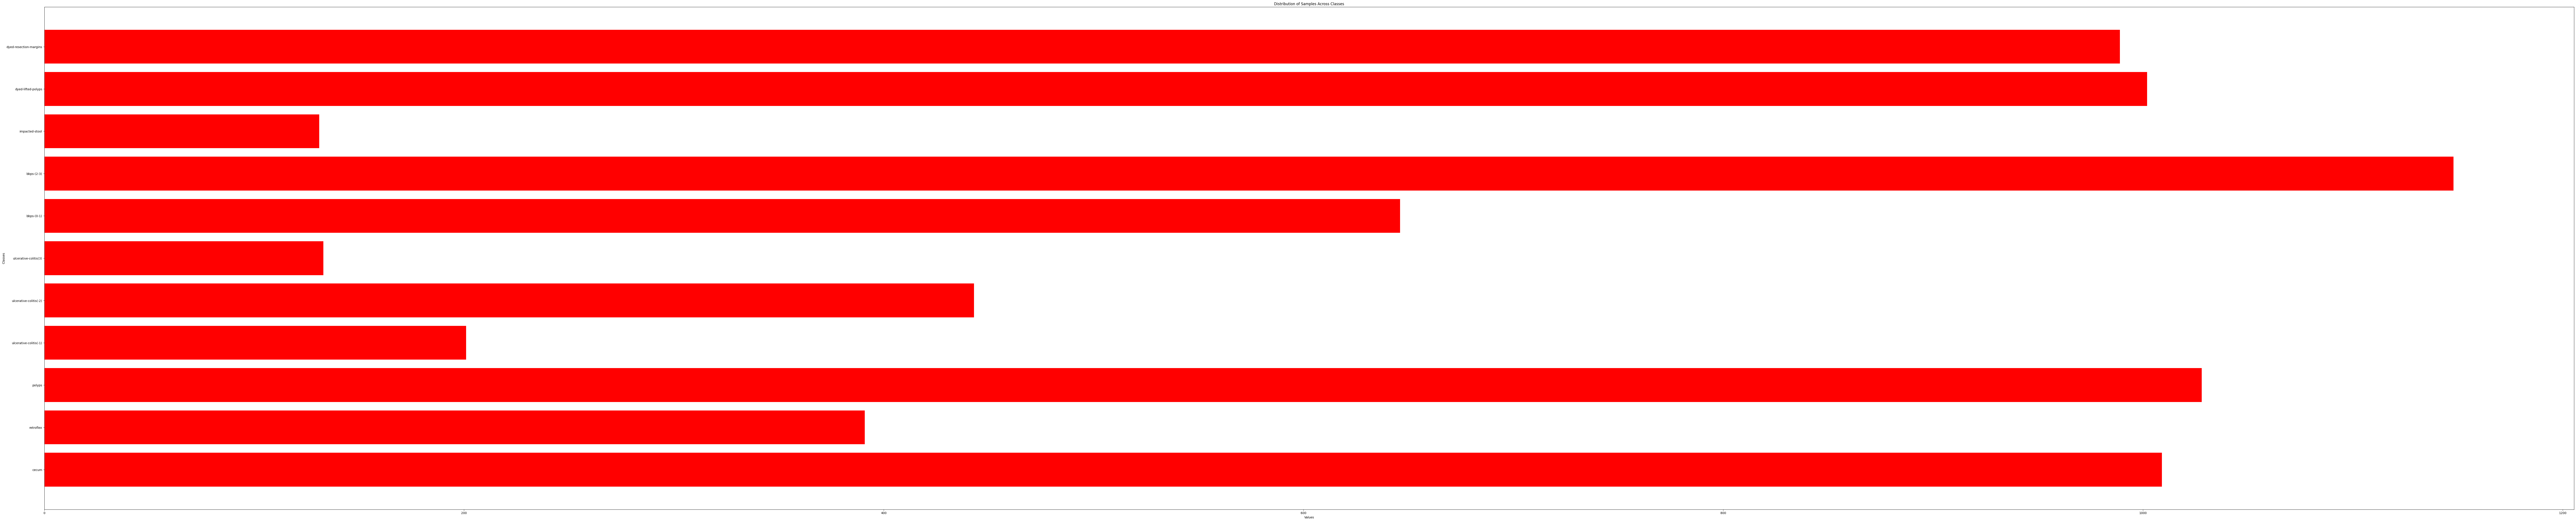

In [ ]:
import matplotlib.pyplot as plt


# Assuming you want to plot the count of each class in the original 'y' array

classes=['cecum', 'retroflex', 'polyps', 'ulcerative-colitis(-1)', 'ulcerative-colitis(-2)', 'ulcerative-colitis(3)',  'bbps-(0-1)', 'bbps-(2-3)', 'impacted-stool',  'dyed-lifted-polyps', 'dyed-resection-margins']
values=[1009, 391, 1028, 201, 443, 133, 646, 1148, 131, 1002, 989]# Create a bar plot
plt.figure(figsize=(150,30))
plt.barh(classes,values, color='red')
plt.title('Distribution of Samples Across Classes')
plt.xlabel('Values')
plt.ylabel('Classes')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_VGG19_11_class_70 20 10/Graph/Distribution_of_Samples_Across_Classes.png')
plt.show()



In [ ]:
# Spliting the dataset into training (80%), validation(5% of training data) and testing (20%) sets, using stratification
# stratify=Y used to maintain the proportion of each class in both train and test sets.
# random_state=0 (for spliting)
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# spliting for tarining
x_train, X_test, y_train, Y_test = train_test_split(images, Y, test_size=0.3, random_state=50, stratify=Y, shuffle = True)

In [ ]:
# for training
print("Total Data: ", y.shape)
print("Total Data: ", Y.shape)
print("Test Data: ", X_test.shape)
print("Remaining Data for Training :",x_train.shape)
print(Y_test.shape)
# print(len(train_x))
# print(train_y.shape)
# print(len(test_x))
# print(test_y.shape)

Total Data:  (7131, 1)
Total Data:  (7131, 11)
Test Data:  (2140, 224, 224, 3)
Remaining Data for Training : (4991, 224, 224, 3)
(2140, 11)


In [ ]:
# spliting for validation
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state=50)

In [ ]:
# for validation
print("Remaining Data for Training :",x_train.shape)
print("Data for Training (x new):",X_train.shape)
print("Data for Validation (x valid new):",X_valid.shape)
print("Data for Training (y new):",Y_train.shape)
print("Data for Validation (y valid new):",Y_valid.shape)

Remaining Data for Training : (4991, 224, 224, 3)
Data for Training (x new): (4491, 224, 224, 3)
Data for Validation (x valid new): (500, 224, 224, 3)
Data for Training (y new): (4491, 11)
Data for Validation (y valid new): (500, 11)


**Save Files**

In [ ]:
save_folder = '/content/drive/MyDrive/Student/Saif/Data/HyperKvasir_VGG19_11_class_70 20 10/'  # Define the variable 'save_folder' with the actual path

with open(save_folder + 'X_train.npy', 'wb') as f: # Use '/' for path separator
    np.save(f, X_train)
with open(save_folder + 'X_test.npy', 'wb') as f:
    np.save(f, X_test)
with open(save_folder + 'X_valid.npy', 'wb') as f:
    np.save(f, X_valid)
with open(save_folder + 'Y_train.npy', 'wb') as f:
    np.save(f, Y_train)
with open(save_folder + 'Y_test.npy', 'wb') as f:
    np.save(f, Y_test)
with open(save_folder + 'Y_valid.npy', 'wb') as f:
    np.save(f, Y_valid)

**Load Files**

In [ ]:
save_folder = '/content/drive/MyDrive/Student/Saif/Data/HyperKvasir_VGG19_11_class_70 20 10/'  # Define the variable 'save_folder' with the actual path

with open(save_folder+'X_train.npy', 'rb') as f:
  print(save_folder+'X_train.npy')
  X_train = np.load(f)
with open(save_folder+'X_test.npy', 'rb') as f:
  X_test = np.load(f)
with open(save_folder+'X_valid.npy', 'rb') as f:
  X_valid = np.load(f)
with open(save_folder+'Y_train.npy', 'rb') as f:
  Y_train = np.load(f,allow_pickle=True)
with open(save_folder+'Y_test.npy', 'rb') as f:
  Y_test = np.load(f,allow_pickle=True)
with open(save_folder+'Y_valid.npy', 'rb') as f:
  Y_valid = np.load(f,allow_pickle=True)
labelsize = Y_train.shape[1]

/content/drive/MyDrive/Student/Saif/Data/HyperKvasir_VGG19_11_class_70 20 10/X_train.npy


In [ ]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size): # Use __init__ for constructor
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self): # Use __len__ for length method
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx): # Use __getitem__ for item retrieval
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train, Y_train, 32)
test_gen = DataGenerator(X_test, Y_test, 32)
valid_gen = DataGenerator(X_valid, Y_valid, 32)

In [ ]:
# Create a InceptionV3 architecture with ImageNet pre-trained weights, ensuring all layers are trainable.
from tensorflow.keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

a = Flatten()(model.output)

# Freeze the layers of the base model
for layer in model.layers:
    layer.trainable = True


# Add a new output layer with 6 units (assuming a classification task with 6 classes)
new_output_layer = Dense(11, activation='softmax', name='new_output')(a)


# Create a new model with the modified output layer
trained_model = Model(inputs=model.input, outputs=new_output_layer, name="InceptionV3")

# Display the summary of the modified model
trained_model.summary()

In [ ]:
# Compile and train the model for 50 epochs.
trained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (4491, 224, 224, 3)
Y_train shape: (4491, 11)


In [ ]:
Y_pred = trained_model.predict(X_train)
print(f"Y_pred shape: {Y_pred.shape}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step
Y_pred shape: (4491, 11)


In [ ]:
# incorporating early stopping
# patience - Number of epochs with no improvement after which training will be stopped.
# verbose - Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
import keras.callbacks
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [early_stopping]

In [ ]:
#checkpoint
import keras.callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(

    filepath='/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/HyperKvasir_InceptionNetV3_11_class.weights.h5',  # Save the model weights to this file
    save_weights_only=True,        # Save only the weights
    save_best_only=True,           # Save only the best weights (based on monitored metric)
    monitor='val_loss',            # Monitor the validation loss
    mode='min',                    # Save the model with minimum validation loss
    verbose=1                      # Verbosity mode, 1 = update messages
)

In [ ]:
# Use train_images, train_labels, test_images, test_labels
history = trained_model.fit(train_gen, validation_data=(valid_gen), epochs=50,  batch_size = 32, callbacks = [early_stopping, checkpoint])

trained_model.save("/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/HyperKvasir_InceptionNetV3_11_class_model.keras") #tensorflow format
trained_model.save('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/HyperKvasir_InceptionNetV3_11_class_model.h5')#hdf5

Epoch 1/50
141/141 [==============================] - ETA: 0s - loss: 2.0065 - accuracy: 0.5259
Epoch 1: val_loss improved from inf to 463243.09375, saving model to /content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/HyperKvasir_InceptionNetV3_11_class.weights.h5
141/141 [==============================] - 84s 334ms/step - loss: 2.0065 - accuracy: 0.5259 - val_loss: 463243.0938 - val_accuracy: 0.1620
Epoch 2/50
141/141 [==============================] - ETA: 0s - loss: 1.5672 - accuracy: 0.6297
Epoch 2: val_loss improved from 463243.09375 to 209.00647, saving model to /content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/HyperKvasir_InceptionNetV3_11_class.weights.h5
141/141 [==============================] - 43s 306ms/step - loss: 1.5672 - accuracy: 0.6297 - val_loss: 209.0065 - val_accuracy: 0.4240
Epoch 3/50
141/141 [==============================] - ETA: 0s - loss: 1.4136 - accuracy: 0.6535
Epoch 3: val_loss d

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install --upgrade tensorflow

**Load the model**

In [ ]:
import tensorflow.keras.models

# Loading the model
from tensorflow.keras.models import load_model
new_trained_model = load_model("/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/HyperKvasir_InceptionNetV3_11_class_model.h5")

In [ ]:
new_trained_model.summary()

In [ ]:
# Evaluate and display training and testing accuracy.

train_accuracy = new_trained_model.evaluate(X_train, Y_train, verbose=0)[1]
test_accuracy = new_trained_model.evaluate(X_test, Y_test, verbose=0)[1]
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 94.81%
Testing Accuracy: 89.44%


In [ ]:
predictions = trained_model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step


In [ ]:
# print(predictions[0])
# predicted_labels = np.argmax(predictions, axis=1)
print(np.argmax(predictions, axis=1))

[9 2 1 ... 1 2 2]


In [ ]:
import pandas  as pd
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/Student/Saif/Csv_File/HyperKvasir_VGG19_11_class_labels.csv/labels.csv')
print(df)

                   Label
0     dyed-lifted-polyps
1     dyed-lifted-polyps
2     dyed-lifted-polyps
3     dyed-lifted-polyps
4     dyed-lifted-polyps
...                  ...
7126              polyps
7127              polyps
7128              polyps
7129              polyps
7130              polyps

[7131 rows x 1 columns]


In [ ]:
# Convert encoded labels back to original labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df)

decoded_y_test = label_encoder.inverse_transform(np.argmax(np.array(Y_test), axis=1))

In [ ]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = new_trained_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(decoded_y_test, label_encoder.inverse_transform(predicted_labels), target_names=label_encoder.classes_))

67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step
                               precision    recall  f1-score   support

                   bbps-(0-1)       0.99      0.96      0.98       194
                   bbps-(2-3)       0.97      0.98      0.98       348
                        cecum       0.96      0.98      0.97       303
           dyed-lifted-polyps       0.84      0.88      0.86       301
       dyed-resection-margins       0.88      0.85      0.86       297
               impacted-stool       0.85      0.87      0.86        39
                       polyps       0.98      0.95      0.97       308
             retroflex-rectum       0.93      0.97      0.95       117
ulcerative-colitis-grade-(-1)       0.56      0.25      0.34        60
ulcerative-colitis-grade-(-2)       0.61      0.78      0.68       133
ulcerative-colitis-grade-(-3)       0.47      0.35      0.40        40

                     accuracy                           0.89      2140
                    macro avg    

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


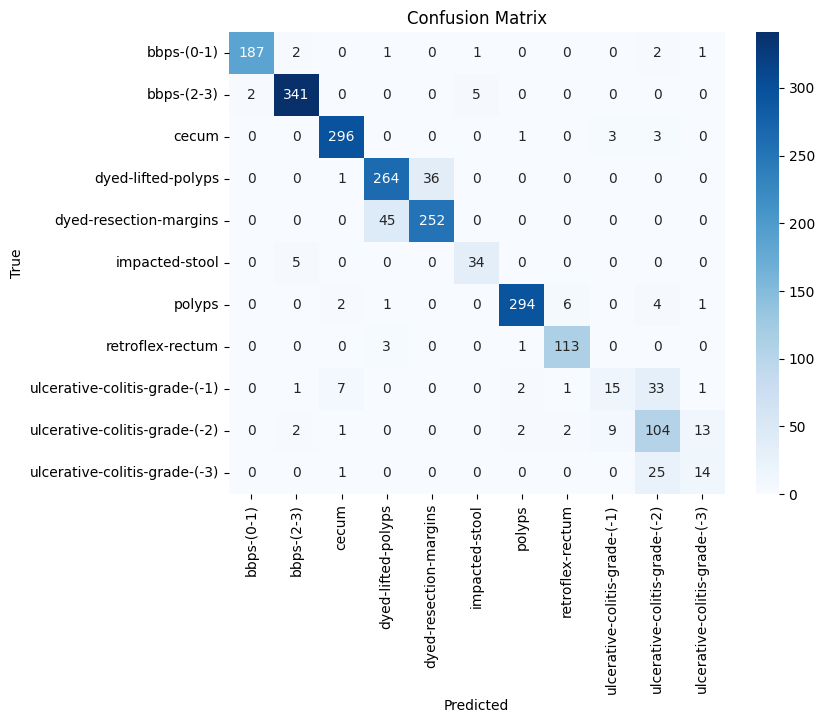

In [ ]:
#Generate a confusion matrix.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix # Import the missing function
from sklearn.preprocessing import MultiLabelBinarizer


# Generate a classification report and a confusion matrix using the Seaborn library.

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = new_trained_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

Y_test_multiclass = np.argmax(Y_test, axis=1)


cm = confusion_matrix(Y_test_multiclass, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix.png')
plt.show()

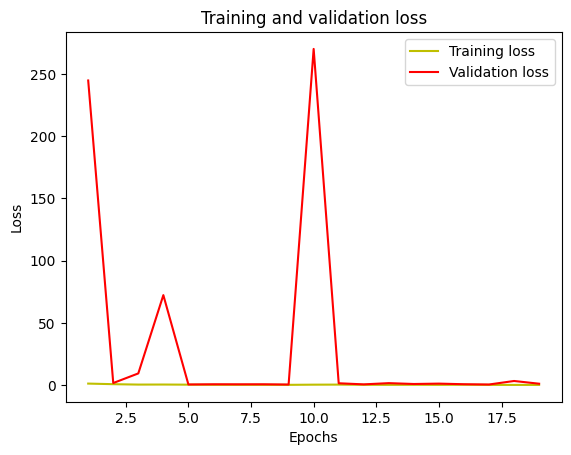

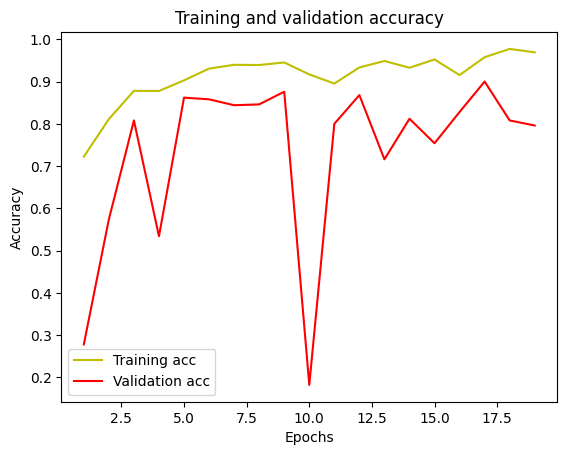

In [ ]:
# Plot graphs for training and validation accuracy and loss, and analyze overfitting or underfitting
import matplotlib.pyplot as plt

# plot the loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Training_and_validation_loss.png')
plt.show()

# plot the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Training_and_validation_accuracy.png')
plt.show()

Input image shape: (1, 224, 224, 3)


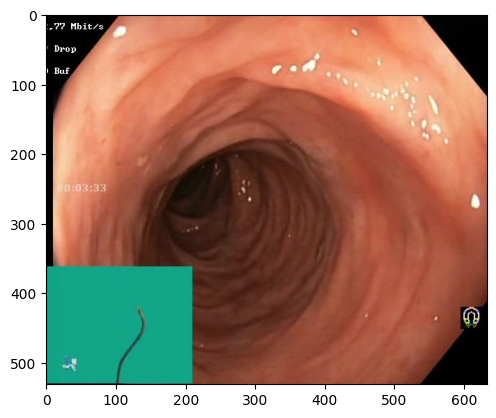

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input


img_path =  '/content/drive/MyDrive/Student/Saif/Dataset/hyper-kvasir-labeled-images/lower-gi-tract/quality-of-mucosal-views/bbps-(2-3)/mucosal - bbps-(2-3)  (673).jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

**Drop Last Layer**

In [ ]:
model_new = Model(inputs=model.input, outputs=model.get_layer('mixed10').output)
#model_new.summary()

In [ ]:
model_new.load_weights('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Save_Model/70_20_10/HyperKvasir_Inception_net_11_class_70/20/10.weights.h5')

In [ ]:
features_train_Inception_net= model_new.predict(X_train)
features_test_Inception_net = model_new.predict(X_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step


In [ ]:
features_train_Inception_net_round = np.reshape(features_train_Inception_net, (features_train_Inception_net.shape[0], -1))
features_test_Inception_net_round = np.reshape(features_test_Inception_net, (features_test_Inception_net.shape[0], -1))

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)#try different values
features_train_pca = pca.fit_transform(features_train_Inception_net_round)
features_test_pca = pca.transform(features_test_Inception_net_round)
print(features_train_pca.shape)  # Should output (3239, 364)
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()
print(f"Total variance explained by 364 components: {total_variance * 100:.2f}%")

(4491, 300)
Total variance explained by 364 components: 99.87%


**SVM**

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# If y_train and y_test are one-hot encoded, convert them back to class labels
y_train_1d = np.argmax(Y_train, axis=1)
y_test_1d = np.argmax(Y_test, axis=1)

# Now train the SVM with 1D labels
svm_clf = SVC(kernel='linear')  # You can choose a different kernel like 'rbf' or 'poly'
svm_clf.fit(features_train_pca, y_train_1d)

# Make predictions on the PCA-reduced test data
y_pred = svm_clf.predict(features_test_pca)

# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test_1d, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")

# Optional: Detailed classification report
print(classification_report(y_test_1d, y_pred))


SVM Accuracy: 87.99%
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       194
           1       0.97      0.97      0.97       348
           2       0.95      0.98      0.96       303
           3       0.86      0.84      0.85       301
           4       0.86      0.87      0.86       297
           5       0.74      0.79      0.77        39
           6       0.96      0.95      0.96       308
           7       0.90      0.97      0.94       117
           8       0.40      0.38      0.39        60
           9       0.59      0.62      0.60       133
          10       0.47      0.35      0.40        40

    accuracy                           0.88      2140
   macro avg       0.79      0.79      0.79      2140
weighted avg       0.88      0.88      0.88      2140



### LGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Convert one-hot encoded labels to 1D labels (if needed)
y_train_1d = np.argmax(Y_train, axis=1)
y_test_1d = np.argmax(Y_test, axis=1)

# Step 2: Initialize and train the LightGBM classifier
lgbm_clf = lgb.LGBMClassifier()
lgbm_clf.fit(features_train_pca, y_train_1d)

# Step 3: Make predictions on the PCA-reduced test data
y_pred = lgbm_clf.predict(features_test_pca)

# Step 4: Evaluate the performance of the LGBM classifier
accuracy = accuracy_score(y_test_1d, y_pred)
print(f"LGBM Accuracy: {accuracy * 100:.2f}%")

# Step 5: Generate a classification report
print(classification_report(y_test_1d, y_pred))

# Step 6: Create the confusion matrix
conf_matrix = confusion_matrix(y_test_1d, y_pred)

# Step 7: Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_1d), yticklabels=np.unique(y_test_1d))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix_of_LGBM.png')
plt.show()

### XGB

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:39:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 89.67%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       194
           1       0.98      0.97      0.98       348
           2       0.94      0.98      0.96       303
           3       0.88      0.86      0.87       301
           4       0.87      0.89      0.88       297
           5       0.79      0.85      0.81        39
           6       0.98      0.95      0.96       308
           7       0.93      0.97      0.95       117
           8       0.45      0.33      0.38        60
           9       0.63      0.72      0.67       133
          10       0.49      0.42      0.45        40

    accuracy                           0.90      2140
   macro avg       0.81      0.81      0.81      2140
weighted avg       0.90      0.90      0.90      2140



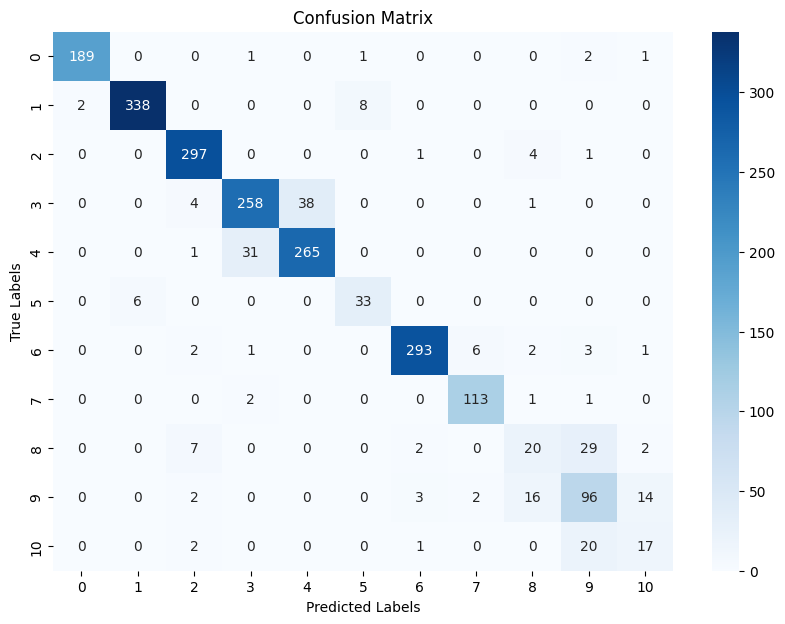

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Convert one-hot encoded labels to 1D labels (if needed)
y_train_1d = np.argmax(Y_train, axis=1)
y_test_1d = np.argmax(Y_test, axis=1)

# Step 2: Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # eval_metric to avoid warnings
xgb_clf.fit(features_train_pca, y_train_1d)

# Step 3: Make predictions on the PCA-reduced test data
y_pred = xgb_clf.predict(features_test_pca)

# Step 4: Evaluate the performance of the XGBoost classifier
accuracy = accuracy_score(y_test_1d, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Step 5: Generate a classification report
print(classification_report(y_test_1d, y_pred))

# Step 6: Create the confusion matrix
conf_matrix = confusion_matrix(y_test_1d, y_pred)

# Step 7: Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_1d), yticklabels=np.unique(y_test_1d))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix_of_XGB.png')
plt.show()


### ADABOOST

AdaBoost Accuracy: 34.72%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       194
           1       0.62      0.98      0.76       348
           2       0.00      0.00      0.00       303
           3       0.00      0.00      0.00       301
           4       0.07      0.01      0.01       297
           5       0.00      0.00      0.00        39
           6       0.24      0.93      0.39       308
           7       0.29      0.94      0.45       117
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00       133
          10       0.50      0.07      0.13        40

    accuracy                           0.35      2140
   macro avg       0.16      0.27      0.16      2140
weighted avg       0.17      0.35      0.21      2140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


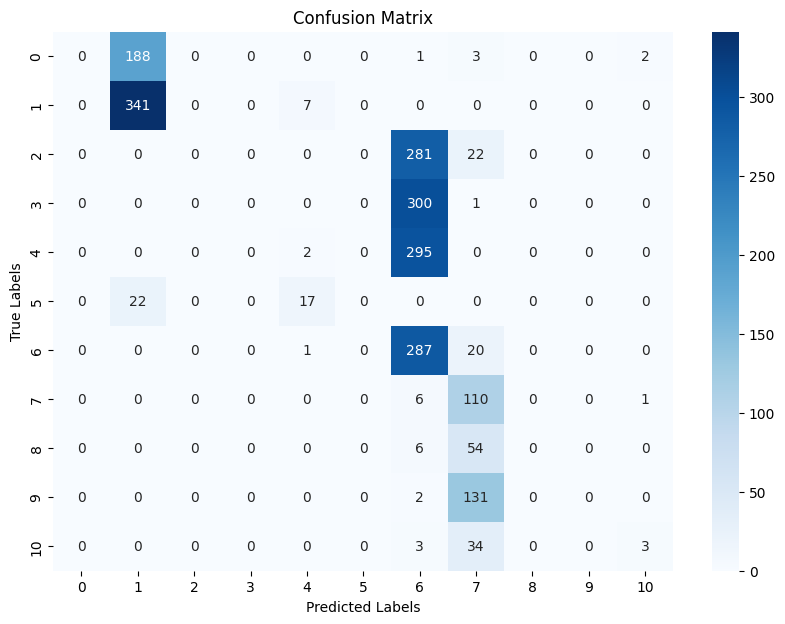

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Convert one-hot encoded labels to 1D labels (if needed)
y_train_1d = np.argmax(Y_train, axis=1)
y_test_1d = np.argmax(Y_test, axis=1)

# Step 2: Initialize and train the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=300)  # You can tweak n_estimators
ada_clf.fit(features_train_pca, y_train_1d)

# Step 3: Make predictions on the PCA-reduced test data
y_pred = ada_clf.predict(features_test_pca)

# Step 4: Evaluate the performance of the AdaBoost classifier
accuracy = accuracy_score(y_test_1d, y_pred)
print(f"AdaBoost Accuracy: {accuracy * 100:.2f}%")

# Step 5: Generate a classification report
print(classification_report(y_test_1d, y_pred))

# Step 6: Create the confusion matrix
conf_matrix = confusion_matrix(y_test_1d, y_pred)

# Step 7: Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_1d), yticklabels=np.unique(y_test_1d))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix_of_ADABOOST.png')
plt.show()


**CATBOOST**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 21.6 MB/s eta 0:00:00
CatBoost Accuracy: 89.21%
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       194
           1       0.98      0.97      0.98       348
           2       0.97      0.98      0.97       303
           3       0.86      0.87      0.86       301
           4       0.88      0.88      0.88       297
           5       0.80      0.90      0.84        39
           6       0.95      0.95      0.95       308
           7       0.92      0.95      0.93       117
           8       0.39      0.28      0.33        60
           9       0.61      0.71      0.66       133
          10       0.55      0.42      0.48        40

    accuracy                           0.89      2140
   macro avg       0.81      0.81      0.81      2140
weighted avg       0.89      0.89      0.89      2140



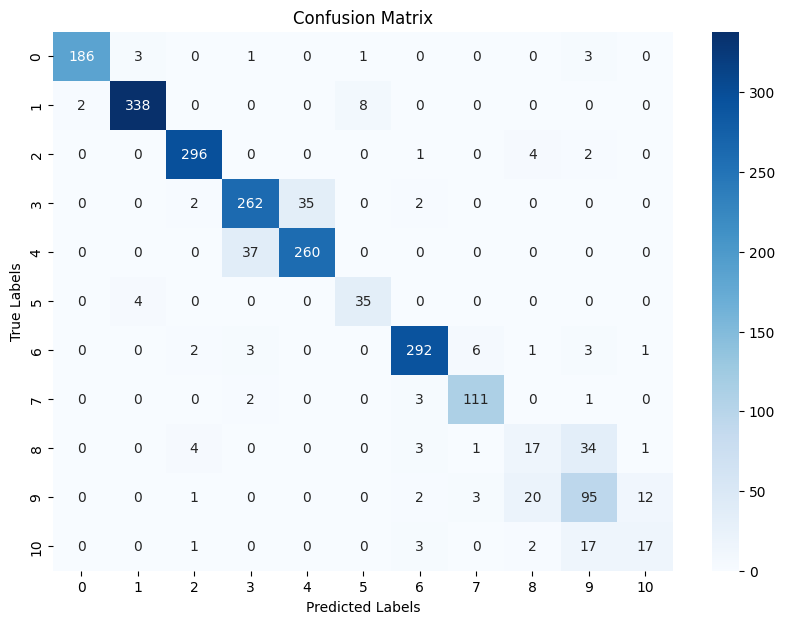

In [ ]:
!pip install catboost

import catboost as cb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Convert one-hot encoded labels to 1D labels (if needed)
y_train_1d = np.argmax(Y_train, axis=1)
y_test_1d = np.argmax(Y_test, axis=1)

# Step 2: Initialize and train the CatBoost classifier
cat_clf = cb.CatBoostClassifier(iterations=100, verbose=0)  # Adjust iterations for more/less training
cat_clf.fit(features_train_pca, y_train_1d)

# Step 3: Make predictions on the PCA-reduced test data
y_pred = cat_clf.predict(features_test_pca)

# Step 4: Evaluate the performance of the CatBoost classifier
accuracy = accuracy_score(y_test_1d, y_pred)
print(f"CatBoost Accuracy: {accuracy * 100:.2f}%")

# Step 5: Generate a classification report
print(classification_report(y_test_1d, y_pred))

# Step 6: Create the confusion matrix
conf_matrix = confusion_matrix(y_test_1d, y_pred)

# Step 7: Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_1d), yticklabels=np.unique(y_test_1d))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix_of_CATBOOST.png')
plt.show()


**KNN**

KNN Accuracy: 89.44%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       194
           1       0.98      0.97      0.98       348
           2       0.95      0.98      0.97       303
           3       0.88      0.83      0.85       301
           4       0.85      0.89      0.87       297
           5       0.79      0.87      0.83        39
           6       0.97      0.96      0.97       308
           7       0.93      0.97      0.95       117
           8       0.44      0.43      0.44        60
           9       0.65      0.70      0.67       133
          10       0.48      0.38      0.42        40

    accuracy                           0.89      2140
   macro avg       0.81      0.81      0.81      2140
weighted avg       0.89      0.89      0.89      2140



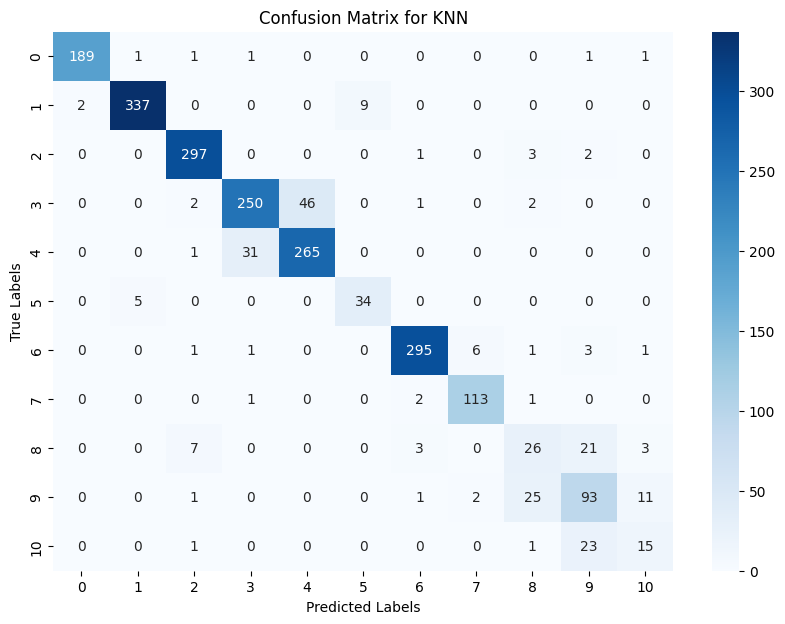

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Convert one-hot encoded labels to 1D labels (if needed)
y_train_1d = np.argmax(Y_train, axis=1)
y_test_1d = np.argmax(Y_test, axis=1)

# Step 2: Initialize and train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # 5 neighbors, you can tune this
knn_clf.fit(features_train_pca, y_train_1d)

# Step 3: Make predictions on the PCA-reduced test data
y_pred_knn = knn_clf.predict(features_test_pca)

# Step 4: Evaluate the performance of the KNN classifier
accuracy_knn = accuracy_score(y_test_1d, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Step 5: Generate a classification report
print(classification_report(y_test_1d, y_pred_knn))

# Step 6: Create the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test_1d, y_pred_knn)

# Step 7: Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_1d), yticklabels=np.unique(y_test_1d))
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix_of_KNN.png')
plt.show()


**KMEANS**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


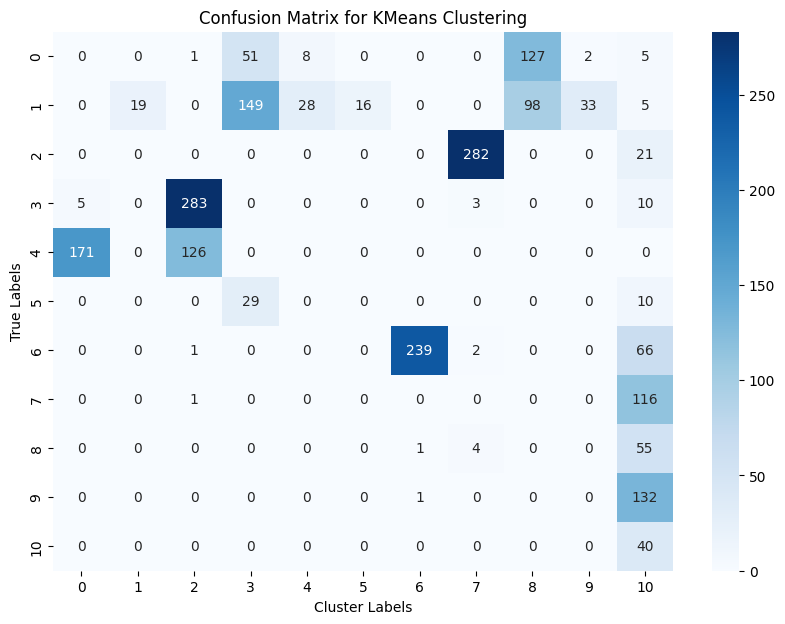

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=11, random_state=42)
y_pred_kmeans = kmeans.fit_predict(features_test_pca)

# Step 2: Since KMeans clustering doesn't match labels directly, you can try to map cluster indices to actual labels.
# This step can be skipped for unsupervised clustering, but we try to evaluate how well it clusters with known labels.

# Step 3: Create the confusion matrix for KMeans
conf_matrix_kmeans = confusion_matrix(y_test_1d, y_pred_kmeans)

# Step 4: Plot the confusion matrix for KMeans clustering
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_1d), yticklabels=np.unique(y_test_1d))
plt.title('Confusion Matrix for KMeans Clustering')
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')
plt.savefig('/content/drive/MyDrive/Student/Saif/Models_&_Graphs/HyperKvasir_Inception _net/Graph/70_20_10/Confusion_Matrix_of_KMEANS.png')
plt.show()


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize and train the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)  # Increase iterations if necessary
log_reg.fit(features_train_pca, y_train_1d)

# Step 2: Make predictions on the test data
y_pred_logreg = log_reg.predict(features_test_pca)

# Step 3: Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test_1d, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print(classification_report(y_test_1d, y_pred_logreg))

# Step 4: Confusion matrix
conf_matrix_logreg = confusion_matrix(y_test_1d, y_pred_logreg)
print(conf_matrix_logreg )

Logistic Regression Accuracy: 89.02%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       194
           1       0.99      0.97      0.98       348
           2       0.96      0.97      0.97       303
           3       0.86      0.84      0.85       301
           4       0.86      0.87      0.86       297
           5       0.76      0.90      0.82        39
           6       0.97      0.96      0.97       308
           7       0.93      0.98      0.96       117
           8       0.45      0.37      0.40        60
           9       0.61      0.67      0.64       133
          10       0.47      0.40      0.43        40

    accuracy                           0.89      2140
   macro avg       0.80      0.81      0.80      2140
weighted avg       0.89      0.89      0.89      2140

[[188   0   0   1   0   2   0   0   0   3   0]
 [  2 338   0   0   0   8   0   0   0   0   0]
 [  0   0 295   0   1   0   2   0   2   3   0]
 [  1   0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Initialize and train the LDA classifier
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(features_train_pca, y_train_1d)

# Step 2: Make predictions on the test data
y_pred_lda = lda_clf.predict(features_test_pca)

# Step 3: Evaluate the LDA model
accuracy_lda = accuracy_score(y_test_1d, y_pred_lda)
print(f"LDA Accuracy: {accuracy_lda * 100:.2f}%")
print(classification_report(y_test_1d, y_pred_lda))

# Step 4: Confusion matrix
conf_matrix_lda = confusion_matrix(y_test_1d, y_pred_lda)
print(conf_matrix_lda )

LDA Accuracy: 88.97%
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       194
           1       0.99      0.97      0.98       348
           2       0.96      0.97      0.97       303
           3       0.87      0.85      0.86       301
           4       0.88      0.88      0.88       297
           5       0.77      0.95      0.85        39
           6       0.98      0.96      0.97       308
           7       0.94      0.97      0.96       117
           8       0.40      0.62      0.49        60
           9       0.62      0.53      0.57       133
          10       0.40      0.42      0.41        40

    accuracy                           0.89      2140
   macro avg       0.80      0.83      0.81      2140
weighted avg       0.90      0.89      0.89      2140

[[187   1   0   1   0   2   0   0   1   2   0]
 [  2 337   0   0   0   9   0   0   0   0   0]
 [  0   0 293   0   0   0   2   0   7   1   0]
 [  0   0   2 257  36   0